In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('cleaned_dataset.csv')
df.sort_values(by=['track_genre'])
#genre_counts = df['track_genre'].value_counts()
#print(genre_counts)


,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
50865,505,505,43,188.735,0,0.595,0.180,9,-11.391,1,0.0298,0.89000,0.000000,0.1130,0.2610,79.922,3,acoustic
31549,647,647,28,202.594,0,0.306,0.948,0,-2.877,1,0.0989,0.64000,0.000000,0.3530,0.9030,135.760,4,acoustic
60888,776,776,50,245.160,0,0.277,0.291,11,-9.851,0,0.0306,0.90100,0.000025,0.1030,0.1750,75.119,3,acoustic
26698,928,928,25,187.908,0,0.491,0.561,11,-7.225,1,0.0246,0.10800,0.000000,0.1390,0.2200,151.943,4,acoustic
67079,227,227,55,240.952,0,0.647,0.567,1,-8.971,1,0.0328,0.03180,0.000000,0.1330,0.3740,125.871,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,113539,113539,26,159.781,0,0.509,0.206,0,-17.289,1,0.0803,0.99200,0.900000,0.1870,0.3420,75.057,4,world-music
28301,113526,113526,26,116.000,0,0.437,0.216,0,-21.602,1,0.0522,0.95700,0.936000,0.0983,0.0299,120.266,3,world-music
43800,113133,113133,38,299.186,0,0.425,0.843,4,-5.890,1,0.0307,0.00907,0.000003,0.9130,0.3870,159.975,4,world-music
28389,113524,113524,26,305.573,0,0.404,0.655,9,-8.001,1,0.0340,0.00310,0.000000,0.1650,0.2000,136.946,4,world-music


In [68]:
genre_counts = df['track_genre'].value_counts()
#print(genre_counts)
filtered_genre_count = genre_counts[genre_counts >= 958]
print(filtered_genre_count)
df = df[df["track_genre"].str.contains("study|black-metal|comedy|heavy-metal|bluegrass|forro|malay|grindcore|iranian|idm") == True]
df

track_genre
study          996
black-metal    991
comedy         987
heavy-metal    985
bluegrass      978
forro          967
grindcore      965
malay          965
iranian        958
idm            958
Name: count, dtype: int64


,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6,59519,59519,0,186.250,0,0.123,0.907,0,-8.194,1,0.0869,0.192000,0.93600,0.2340,0.0752,86.817,4,iranian
9,59636,59636,0,615.053,1,0.427,0.516,7,-4.327,1,0.0397,0.008330,0.36100,0.1290,0.0360,120.114,3,iranian
28,59480,59480,0,134.666,0,0.332,0.701,7,-6.735,0,0.0936,0.464000,0.20300,0.1820,0.4910,156.279,3,iranian
29,59737,59737,0,93.000,0,0.444,0.920,7,-4.079,1,0.0495,0.144000,0.93600,0.3410,0.9650,110.295,1,iranian
30,59930,59930,0,223.411,0,0.439,0.953,6,-5.512,1,0.0627,0.000076,0.02690,0.1660,0.0688,127.405,3,iranian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76838,7300,7300,67,232.133,0,0.621,0.403,9,-8.211,1,0.0359,0.581000,0.00000,0.1140,0.6340,145.523,4,bluegrass
77371,7151,7151,69,193.533,0,0.582,0.371,2,-9.585,0,0.0280,0.912000,0.00784,0.1080,0.1630,128.756,4,bluegrass
77644,18003,18003,69,197.760,1,0.802,0.341,7,-8.560,1,0.4880,0.169000,0.00000,0.0783,0.8490,166.010,4,comedy
79162,18015,18015,74,328.666,1,0.927,0.367,9,-7.797,1,0.3820,0.325000,0.00000,0.1320,0.5760,99.053,4,comedy


<Axes: xlabel='duration_s', ylabel='track_genre'>

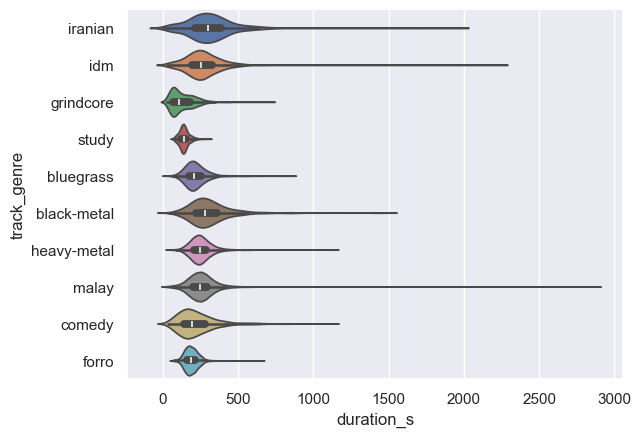

In [75]:
sns.set_theme()
sns.violinplot(hue = 'track_genre', x = 'duration_s', y = 'track_genre', data = df)


<Axes: xlabel='danceability', ylabel='track_genre'>

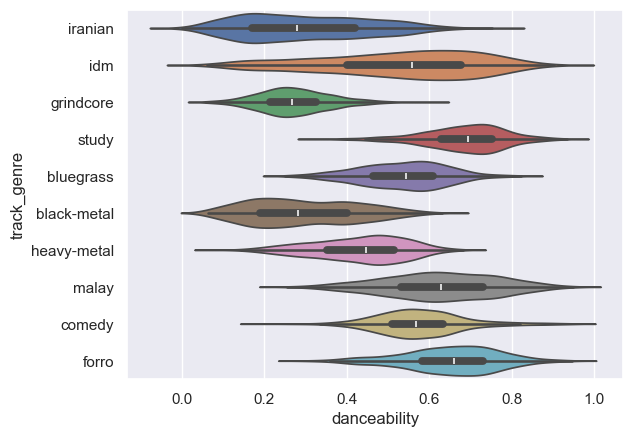

In [76]:
sns.violinplot(hue = 'track_genre',x = 'danceability', y = 'track_genre', data = df)

In [ ]:
df.head
df = df.sort_values(by=['track_genre'])
indexNames = df[df["track_genre"] == "acoustic"].index
df.drop(indexNames, inplace=True)
df

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18029,1536,1536,20,301.133,0,0.389,0.672,11,-8.768,0,0.0688,0.30200,0.790000,0.3450,0.5840,173.954,4,afrobeat
33084,1194,1194,29,434.600,0,0.827,0.359,7,-12.863,1,0.0909,0.33200,0.703000,0.0911,0.6840,135.421,4,afrobeat
15344,1663,1663,19,388.877,0,0.340,0.729,6,-5.995,1,0.0401,0.01340,0.833000,0.1120,0.4150,154.280,4,afrobeat
14263,1779,1779,18,155.306,0,0.775,0.688,7,-7.105,1,0.0471,0.07910,0.847000,0.1290,0.5290,94.620,4,afrobeat
13678,1822,1822,18,568.506,0,0.760,0.626,10,-12.927,0,0.0789,0.56200,0.221000,0.0804,0.8570,99.991,4,afrobeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,113539,113539,26,159.781,0,0.509,0.206,0,-17.289,1,0.0803,0.99200,0.900000,0.1870,0.3420,75.057,4,world-music
28301,113526,113526,26,116.000,0,0.437,0.216,0,-21.602,1,0.0522,0.95700,0.936000,0.0983,0.0299,120.266,3,world-music
43800,113133,113133,38,299.186,0,0.425,0.843,4,-5.890,1,0.0307,0.00907,0.000003,0.9130,0.3870,159.975,4,world-music
28389,113524,113524,26,305.573,0,0.404,0.655,9,-8.001,1,0.0340,0.00310,0.000000,0.1650,0.2000,136.946,4,world-music


In [30]:
df.head
df.sort_values(by=['track_genre'])
df.track_genre == 'afrobeat'
df[df.track_genre == 'afrobeat']

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18029,1536,1536,20,301.133,0,0.389,0.672,11,-8.768,0,0.0688,0.3020,0.790000,0.3450,0.584,173.954,4,afrobeat
33084,1194,1194,29,434.600,0,0.827,0.359,7,-12.863,1,0.0909,0.3320,0.703000,0.0911,0.684,135.421,4,afrobeat
15344,1663,1663,19,388.877,0,0.340,0.729,6,-5.995,1,0.0401,0.0134,0.833000,0.1120,0.415,154.280,4,afrobeat
14263,1779,1779,18,155.306,0,0.775,0.688,7,-7.105,1,0.0471,0.0791,0.847000,0.1290,0.529,94.620,4,afrobeat
13678,1822,1822,18,568.506,0,0.760,0.626,10,-12.927,0,0.0789,0.5620,0.221000,0.0804,0.857,99.991,4,afrobeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37369,1095,1095,33,369.773,0,0.532,0.908,5,-6.124,0,0.2380,0.3670,0.000142,0.9920,0.737,126.229,4,afrobeat
12921,1775,1775,17,214.706,0,0.639,0.638,10,-8.087,1,0.0434,0.2280,0.807000,0.0931,0.936,101.687,4,afrobeat
17671,1646,1646,20,264.133,0,0.696,0.415,6,-12.570,1,0.0379,0.1690,0.847000,0.0888,0.637,95.801,4,afrobeat
13096,1831,1831,17,368.546,0,0.677,0.684,10,-12.910,0,0.0504,0.9530,0.884000,0.0885,0.948,92.185,4,afrobeat


In [31]:
df.head
df = df.sort_values(by=['track_genre'])
indexNames = df[df["track_genre"] == "afrobeat"].index
df.drop(indexNames, inplace=True)
df
#df.track_genre == 'acoustic'
#df[df.track_genre == 'acoustic']

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
55012,2937,2937,45,196.207,0,0.526,0.884,5,-3.359,1,0.0757,0.046900,0.000000,0.3150,0.6570,156.021,4,alt-rock
72619,2659,2659,61,188.333,0,0.540,0.780,9,-5.872,1,0.0418,0.026300,0.000007,0.3500,0.5140,144.011,4,alt-rock
55059,2876,2876,45,321.333,0,0.527,0.833,7,-5.977,1,0.0534,0.000105,0.000000,0.1380,0.5790,122.036,4,alt-rock
78040,2967,2967,70,403.533,0,0.567,0.714,9,-8.512,0,0.0302,0.001200,0.417000,0.1860,0.1910,107.441,3,alt-rock
78138,2308,2308,71,250.900,0,0.542,0.433,9,-10.470,1,0.0305,0.897000,0.173000,0.1010,0.4950,140.939,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64207,113312,113312,53,213.730,0,0.194,0.324,1,-12.412,1,0.0338,0.902000,0.196000,0.1090,0.1570,169.758,3,world-music
46900,113958,113958,40,129.933,0,0.340,0.320,7,-15.807,1,0.0495,0.906000,0.000000,0.9760,0.5750,66.443,4,world-music
45710,113816,113816,39,428.186,0,0.316,0.581,7,-6.609,1,0.0325,0.087300,0.000000,0.0699,0.1750,141.705,4,world-music
46919,113753,113753,40,344.853,0,0.455,0.445,0,-9.249,1,0.0306,0.155000,0.000008,0.1740,0.0987,142.004,4,world-music


In [32]:
df.head
df.sort_values(by=['track_genre'])
df.track_genre == 'alt-rock'
df[df.track_genre == 'alt-rock']

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
55012,2937,2937,45,196.207,0,0.526,0.884,5,-3.359,1,0.0757,0.046900,0.000000,0.315,0.657,156.021,4,alt-rock
72619,2659,2659,61,188.333,0,0.540,0.780,9,-5.872,1,0.0418,0.026300,0.000007,0.350,0.514,144.011,4,alt-rock
55059,2876,2876,45,321.333,0,0.527,0.833,7,-5.977,1,0.0534,0.000105,0.000000,0.138,0.579,122.036,4,alt-rock
78040,2967,2967,70,403.533,0,0.567,0.714,9,-8.512,0,0.0302,0.001200,0.417000,0.186,0.191,107.441,3,alt-rock
78138,2308,2308,71,250.900,0,0.542,0.433,9,-10.470,1,0.0305,0.897000,0.173000,0.101,0.495,140.939,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75309,2811,2811,65,275.226,0,0.604,0.789,5,-6.259,1,0.0273,0.001100,0.828000,0.368,0.348,122.032,4,alt-rock
75041,2453,2453,64,192.400,0,0.468,0.961,7,-4.082,1,0.1140,0.003640,0.000000,0.226,0.310,94.926,4,alt-rock
66771,2759,2759,55,226.478,0,0.578,0.861,10,-6.043,1,0.0995,0.032800,0.019000,0.103,0.575,142.032,4,alt-rock
49789,2608,2608,42,281.826,0,0.592,0.474,4,-8.288,1,0.0262,0.557000,0.000000,0.148,0.317,130.000,4,alt-rock


In [34]:
df.head
df = df.sort_values(by=['track_genre'])
indexNames = df[df["track_genre"] == "alt-rock"].index
indexNames = df[df["track_genre"] == "alternative"].index
df.drop(indexNames, inplace=True)
df
#df.track_genre == 'acoustic'
#df[df.track_genre == 'acoustic']

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
64200,4831,4831,53,415.079,0,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,ambient
64129,4372,4372,53,130.678,0,0.225,0.0368,9,-23.039,0,0.0381,0.9770,0.956000,0.1070,0.0388,169.851,3,ambient
67951,4114,4114,56,95.033,0,0.699,0.1800,4,-22.361,0,0.0731,0.9900,0.836000,0.0649,0.2680,129.775,4,ambient
72247,4074,4074,60,228.164,0,0.261,0.3710,3,-10.112,1,0.0313,0.9600,0.856000,0.1090,0.1490,158.924,4,ambient
6519,4983,4983,7,168.999,0,0.669,0.1610,10,-22.266,1,0.0468,0.9480,0.914000,0.0979,0.1890,127.056,4,ambient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46900,113958,113958,40,129.933,0,0.340,0.3200,7,-15.807,1,0.0495,0.9060,0.000000,0.9760,0.5750,66.443,4,world-music
45710,113816,113816,39,428.186,0,0.316,0.5810,7,-6.609,1,0.0325,0.0873,0.000000,0.0699,0.1750,141.705,4,world-music
58135,113851,113851,48,195.846,0,0.321,0.1480,0,-13.452,1,0.0311,0.8100,0.000000,0.1310,0.1660,139.766,3,world-music
68068,113396,113396,56,234.560,0,0.156,0.7390,11,-6.062,1,0.0436,0.0462,0.000000,0.1580,0.1860,73.354,4,world-music
